In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nikitayamkin","key":"16e471b24fd6e262801175680e4c3a88"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d blastchar/telco-customer-churn
! unzip "telco-customer-churn.zip"

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Отток клиентов телекоммуникационных компаний

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Исходные данные содержат 7043 строки (клиенты) и 21 столбец (характеристики).

Целевая переменная - столбец 'Churn' ('Отток').



**SeniorCitizen** - является ли клиент пожилым человеком или нет (1, 0)

**Partner** - есть ли у клиента партнер или нет (Yes, No)

**Dependents** - есть ли у клиента иждивенцы или нет (Yes, No)

**tenure** - количество месяцев, в течение которых клиент пользовался услугами компании

**PhoneService** -  есть ли у клиента мобильная связь или нет (Yes, No)

**MultipleLines** - есть ли у клиента несколько операторов или нет  (Yes, No, No phone service)

**InternetService** - интернет-провайдер клиента (DSL, Fiber optic, No)

**OnlineSecurity** - есть ли у клиента онлайн-защита или нет (Yes, No, No internet service)

**Online Backup** - есть ли у клиента онлайн-резервное копирование или нет (Yes, No, No internet service)

**Device Protection** - есть ли у клиента защита устройства или нет (Yes, No, No internet service)

**TechSupport** - есть у клиента техническая поддержка или нет (Yes, No, No internet service)

**StreamingTV** - есть у клиента потоковое телевидение или нет (Yes, No, No internet service)

**StreamingMovies** - есть ли у клиента потоковое видео или нет (Yes, No, No internet service)

**Contract** - срок действия контракта (Month-to-month, One year, Two year)

**PaperlessBilling** - выставляет ли клиент безбумажный счет или нет (Yes, No)

**Payment Method** - выбранный клиентом способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card

**MonthlyCharges** - сумма, взимаемая с клиента ежемесячно

**TotalCharges** - общая сумма, списанная с клиента

**Churn** - был ли клиент удовлетворен или нет  (Yes or No)

In [159]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Видим, что пропусков в данных нет.


#### Распределение целевой переменной

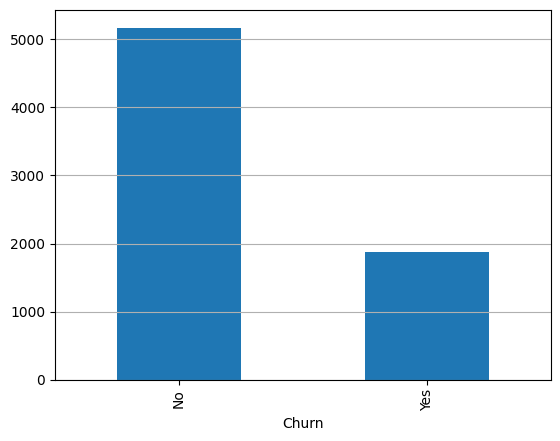

In [161]:
df['Churn'].value_counts().plot.bar()
plt.grid(axis = 'y')
plt.show()

In [162]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


Здесь же можно прикинуть наш baseline качества, с которым можно будет сравнивать результаты работы модели. Если у нас 73% одного класса и 27% другого, то даже если наша модель будет предсказывать только No, то accuracy будет равна, в среднем, 73%.

##### Preprocessing

In [163]:
# Preprocessing
df.drop('customerID',axis=1,inplace=True)

df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']] = \
df[['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].replace({'Yes':1,'No':0})

df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

df['TotalCharges'] = df['TotalCharges'].replace({' ': None}).astype('float')

df = df.dropna()

In [164]:
# Применяем One-Hot Encoding
df = pd.get_dummies(data = df,columns = ['PaymentMethod','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract'],drop_first=False, dtype='int')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  PaymentMethod_Bank transfer (automatic)  7032 non-nul

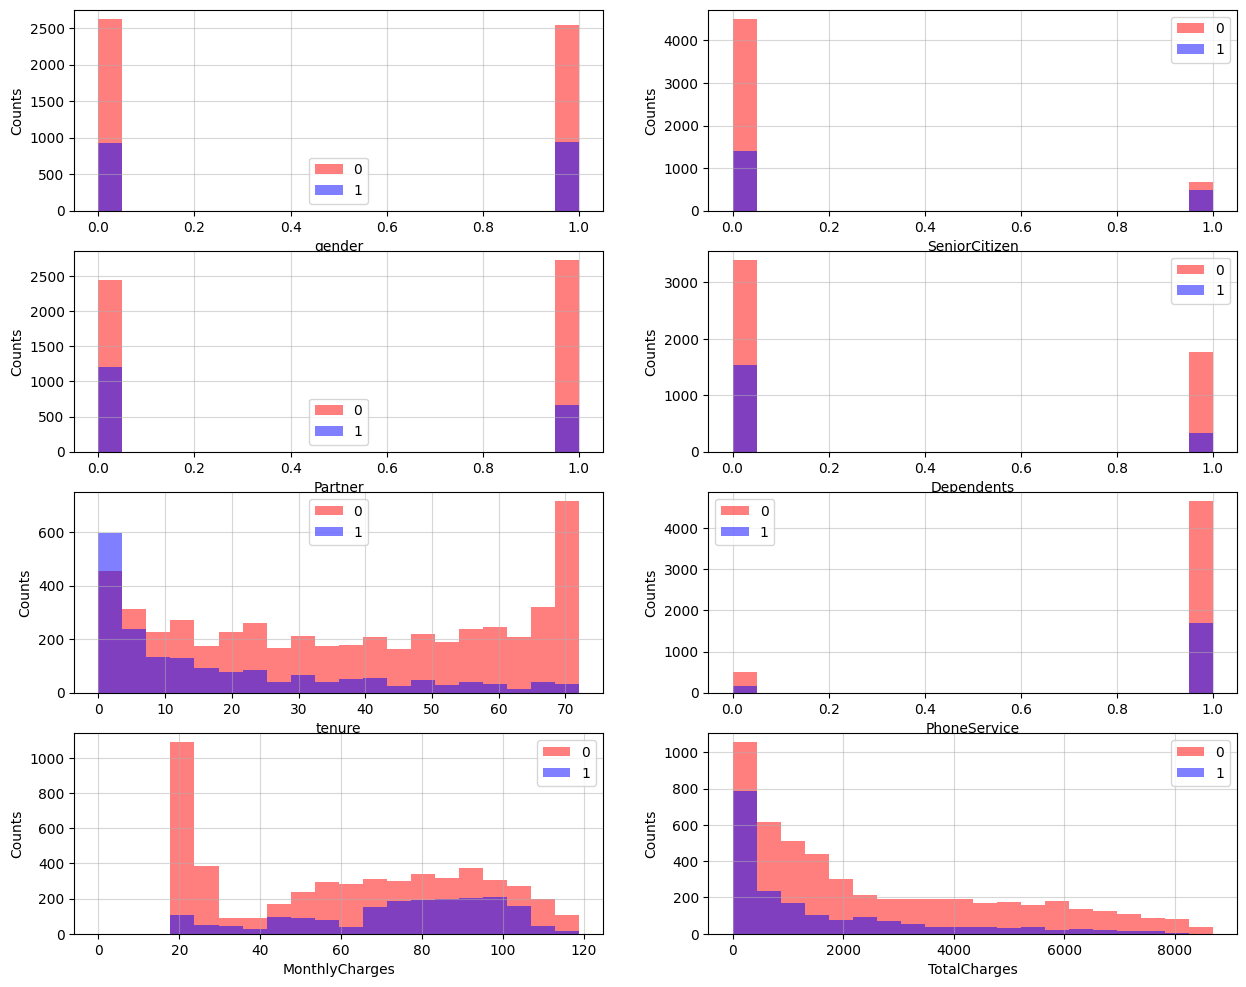

In [25]:
X_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges']
# X_columns = list(df.select_dtypes('number').columns)
# X_columns.remove('Churn')
y_column = 'Churn'

# Define size of the figure
plt.figure(figsize=(15, 12))

# For each column ...
for i_col in range(len(X_columns)):

    # Create subplot for each column
    plt.subplot(4, 2, i_col+1)

    # Get column and label values
    x_col = df[X_columns[i_col]].values
    y_col = df[y_column].values

    # Plot histograms
    bins = np.linspace(0, x_col.max(), 21)
    plt.grid(alpha = 0.5)
    plt.hist(x_col[y_col == 0], bins=bins, color='r', alpha=0.5, label='0')
    plt.hist(x_col[y_col == 1], bins=bins, color='b', alpha=0.5, label='1')

    # Labels and legend
    plt.xlabel(X_columns[i_col])
    plt.ylabel('Counts')
    plt.legend(loc='best')

plt.show()

<Axes: >

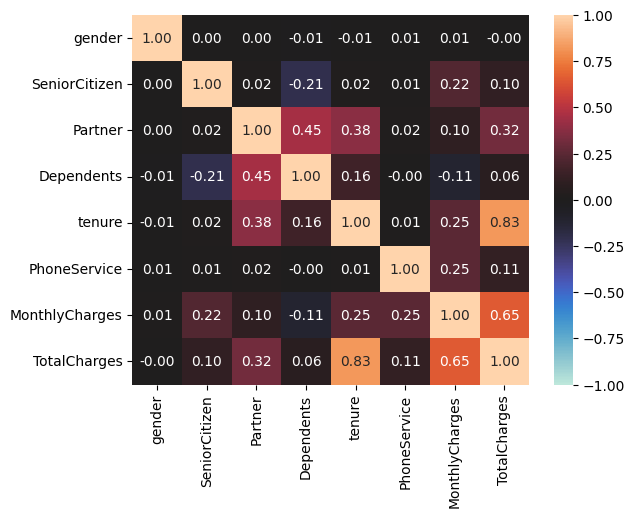

In [98]:
# sns.heatmap(df.select_dtypes('number').corr(), vmin=-1, vmax=1, center = 0, annot =True, fmt = '.2f')
sns.heatmap(df[X_columns].corr(), vmin=-1, vmax=1, center = 0, annot =True, fmt = '.2f')

Нормализация (или масштабирование) числовых признаков не является обязательной при использовании деревьев решений (Decision Trees), включая такие алгоритмы, как Random Forest и Gradient Boosting. Основная причина заключается в том, что деревья решений обрабатывают данные, разделяя их на основании порогов значений признаков, а не в зависимости от их масштаба.

In [51]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [26]:
# Импортируем модели из библиотеки scikit-learn
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [167]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis = 1), df['Churn'], random_state = 13, test_size=0.2)

In [168]:
from imblearn.over_sampling import SMOTE

# X = df.drop(columns=['Churn'])
# y = df['Churn']

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(df.drop(columns=['Churn']), df['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# from sklearn.preprocessing import StandardScaler
# # Нормализация числовых признаков
# scaler = StandardScaler()
# X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
# X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [28]:
def roc_auc_plot(y_test, pred_proba):
  # Вычисляем False Positive Rate (fpr), True Positive Rate (tpr) и пороговые значения (thresholds) для построения ROC-кривой.
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
  # Вычисляем площадь под ROC-кривой (ROC-AUC)
  roc_auc = auc(fpr, tpr)

  # Построение ROC-кривой
  plt.figure(figsize = (8,6))
  # Строим ROC-кривую
  plt.plot(fpr, tpr, color = 'darkorange', lw =2, label = f'ROC-кривая {roc_auc:.2f}')
  # Добавляем диагональную линию (случайный классификатор)
  plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
  # Подписываем оси
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  # Заголовок графика
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  # Легенда
  plt.legend(loc = 'lower right')
  # Сетка
  plt.grid()
  plt.show()

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

### Обучим ансамбли из коробки

#### LightGBM

In [169]:
lightgbm_model = LGBMClassifier(max_depth = 3,
                                n_estimators = 100,
                                objective = 'binary',
                                )
lightgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4134, number of negative: 4126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500484 -> initscore=0.001937
[LightGBM] [Info] Start training from score 0.001937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(max_depth=3, objective='binary')

In [170]:
lightgbm_pred = lightgbm_model.predict(X_test)
lightgbm_pred_proba = lightgbm_model.predict_proba(X_test)

In [171]:
lightgbm_precision = precision_score(y_test, lightgbm_pred)
lightgbm_recall = recall_score(y_test, lightgbm_pred)
lightgbm_f1 = f1_score(y_test, lightgbm_pred)

print(f'Precision LightGBM: {lightgbm_precision:.2f} \nRecall LightGBM: {lightgbm_recall:.2f}\nF1 LightGBM: {lightgbm_f1:.2f}')

Precision LightGBM: 0.84 
Recall LightGBM: 0.87
F1 LightGBM: 0.85


LightGBM Accuracy: 0.85
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1037
           1       0.84      0.87      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



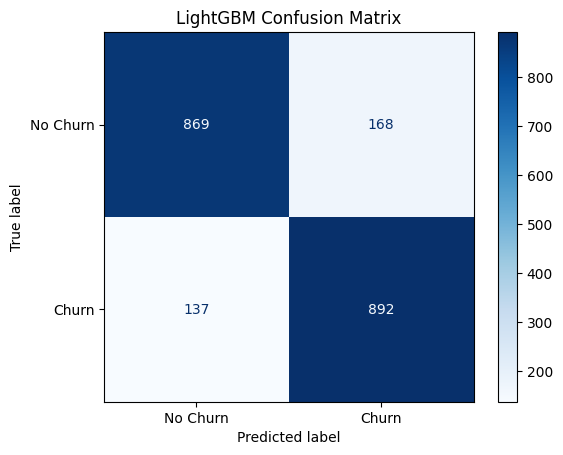

In [172]:
evaluate_model(lightgbm_model, X_test, y_test, "LightGBM")

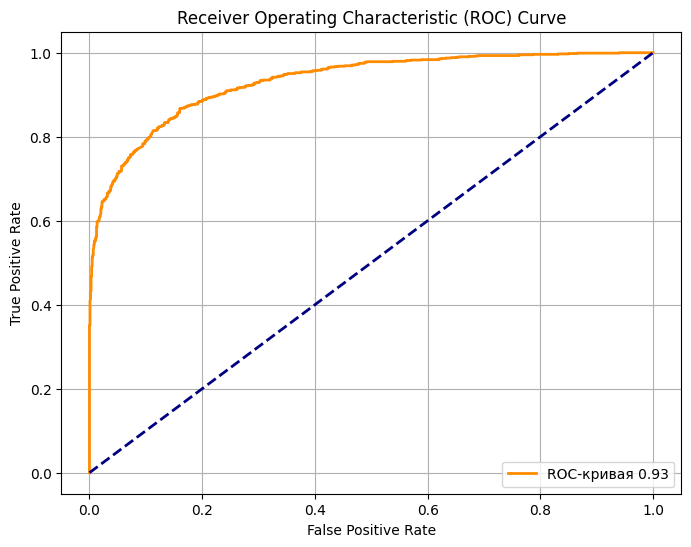

In [173]:
roc_auc_plot(y_test, lightgbm_pred_proba)

#### CatBoostClassifier

In [174]:
catboost_model = CatBoostClassifier(iterations = 100,
                                    depth=3)
catboost_model.fit(X_train, y_train)

Learning rate set to 0.209645
0:	learn: 0.6255357	total: 2.64ms	remaining: 262ms
1:	learn: 0.5720315	total: 5.68ms	remaining: 279ms
2:	learn: 0.5310927	total: 8.09ms	remaining: 262ms
3:	learn: 0.4855783	total: 11.1ms	remaining: 266ms
4:	learn: 0.4671313	total: 14.6ms	remaining: 277ms
5:	learn: 0.4502305	total: 17.2ms	remaining: 270ms
6:	learn: 0.4281661	total: 20.2ms	remaining: 268ms
7:	learn: 0.4189430	total: 23.1ms	remaining: 265ms
8:	learn: 0.4116448	total: 26.1ms	remaining: 264ms
9:	learn: 0.4044449	total: 28.6ms	remaining: 258ms
10:	learn: 0.3970687	total: 33.8ms	remaining: 274ms
11:	learn: 0.3920685	total: 36.8ms	remaining: 270ms
12:	learn: 0.3888383	total: 39.5ms	remaining: 265ms
13:	learn: 0.3847829	total: 42.9ms	remaining: 264ms
14:	learn: 0.3817929	total: 45.7ms	remaining: 259ms
15:	learn: 0.3777191	total: 49.1ms	remaining: 258ms
16:	learn: 0.3744250	total: 51.8ms	remaining: 253ms
17:	learn: 0.3703032	total: 54.6ms	remaining: 249ms
18:	learn: 0.3673383	total: 57.3ms	remaining

In [175]:
catboost_pred = catboost_model.predict(X_test)
catboost_pred_proba = catboost_model.predict_proba(X_test)

In [176]:
catboost_precision = precision_score(y_test, catboost_pred)
catboost_recall = recall_score(y_test, catboost_pred)
catboost_f1 = f1_score(y_test, catboost_pred)
# lightgbm_roc_auc = roc_auc_score(y_test, lightgbm_pred_proba[:, 1])
print(f'Precision Catboost: {catboost_precision:.2f} \nRecall Catboost: {catboost_recall:.2f}\nF1 Catboost: {catboost_f1:.2f}')

Precision Catboost: 0.86 
Recall Catboost: 0.84
F1 Catboost: 0.85


CatBoost Accuracy: 0.85
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1037
           1       0.86      0.84      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



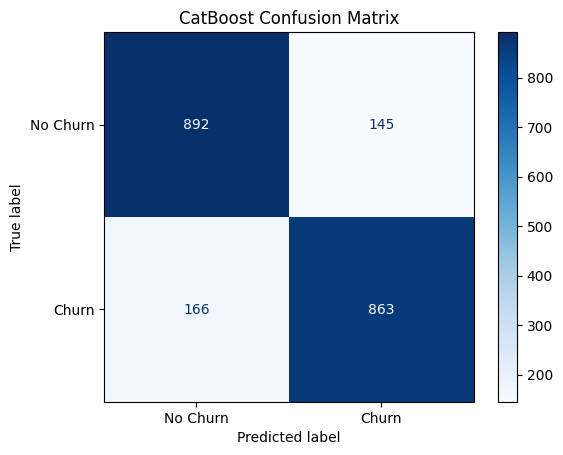

In [177]:
evaluate_model(catboost_model, X_test, y_test, "CatBoost")

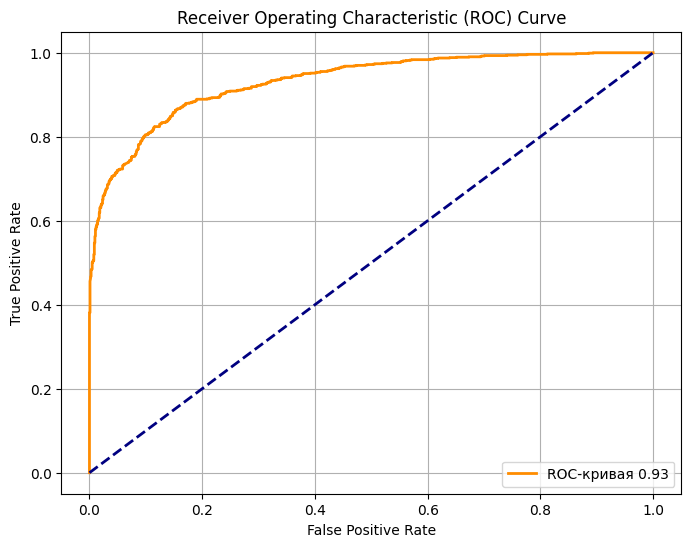

In [178]:
roc_auc_plot(y_test, catboost_pred_proba)

#### XGBClassifier

In [179]:
xgb_model = XGBClassifier(n_estimators = 100,
                          max_depth = 3)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [180]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)

In [181]:
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
# lightgbm_roc_auc = roc_auc_score(y_test, lightgbm_pred_proba[:, 1])
print(f'Precision XGBoost: {xgb_precision:.2f} \nRecall XGBoost: {xgb_recall:.2f}\nF1 XGBoost: {xgb_f1:.2f}')

Precision XGBoost: 0.85 
Recall XGBoost: 0.85
F1 XGBoost: 0.85


XGB Accuracy: 0.85
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1037
           1       0.85      0.85      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



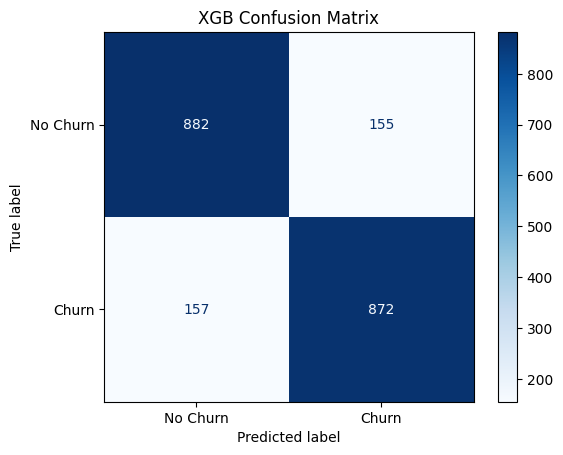

In [182]:
evaluate_model(xgb_model, X_test, y_test, "XGB")

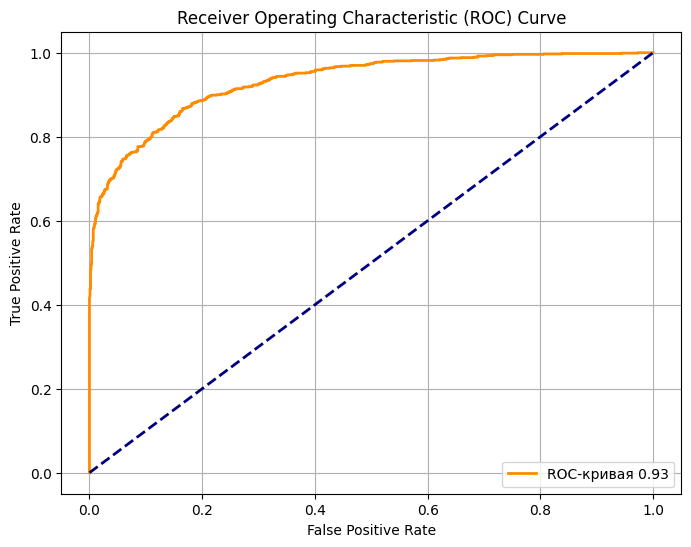

In [183]:
roc_auc_plot(y_test, xgb_pred_proba)

#### GradientBoostingClassifier

In [184]:
gbc_model = GradientBoostingClassifier(n_estimators = 100,
                                       max_depth = 3)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [185]:
gbc_pred = gbc_model.predict(X_test)
gbc_pred_proba = gbc_model.predict_proba(X_test)

In [186]:
gbc_precision = precision_score(y_test, gbc_pred)
gbc_recall = recall_score(y_test, gbc_pred)
gbc_f1 = f1_score(y_test, gbc_pred)
# lightgbm_roc_auc = roc_auc_score(y_test, lightgbm_pred_proba[:, 1])
print(f'Precision Gradient Boosting Classifier: {gbc_precision:.2f} \nRecall Gradient Boosting Classifier: {gbc_recall:.2f}\nF1 Gradient Boosting Classifier: {gbc_f1:.2f}')

Precision Gradient Boosting Classifier: 0.84 
Recall Gradient Boosting Classifier: 0.86
F1 Gradient Boosting Classifier: 0.85


GradientBoostingClassifier Accuracy: 0.85
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1037
           1       0.84      0.86      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



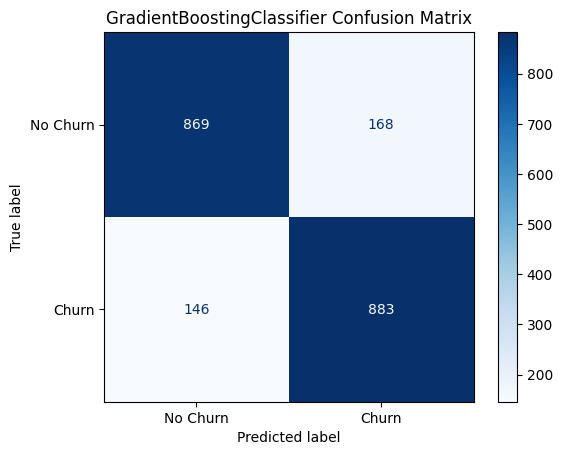

In [187]:
evaluate_model(gbc_model, X_test, y_test, "GradientBoostingClassifier")

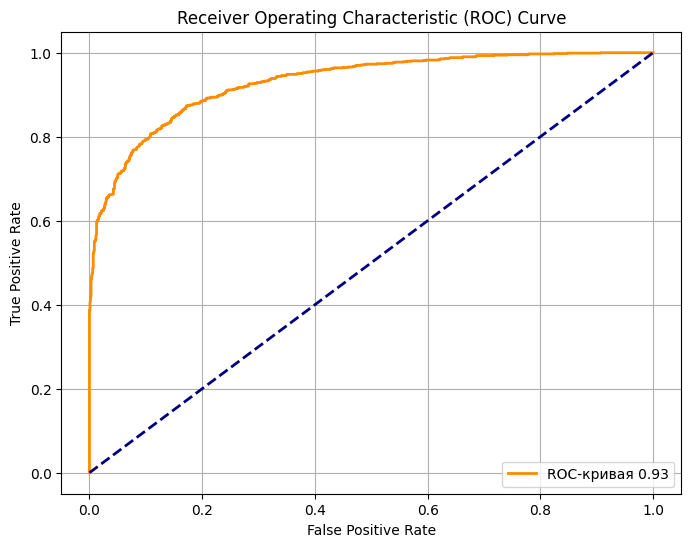

In [188]:
roc_auc_plot(y_test, gbc_pred_proba)

### Обучим ансамбли с применением GridSearch

In [189]:
parameters = {'n_estimators': [5, 10, 50, 100],
              'max_depth':[-1, 3, 5, 10],
              'num_leaves' : [5, 10, 20, 30],
              'subsample_for_bin': [500, 750, 1000, 1500]
              }

#### LightGBM

In [190]:
lightgbm_model = LGBMClassifier()

grid_lightgbm = GridSearchCV(lightgbm_model, parameters, scoring = 'accuracy')

grid_lightgbm.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': [-1, 3, 5, 10],
                         'n_estimators': [5, 10, 50, 100],
                         'num_leaves': [5, 10, 20, 30],
                         'subsample_for_bin': [500, 750, 1000, 1500]},
             scoring='accuracy')

In [191]:
# grid_lightgbm_pred = grid_lightgbm.predict(X_test)
# grid_lightgbm_pred_proba = grid_lightgbm.predict_proba(X_test)

In [192]:
best_params = grid_lightgbm.best_params_
best_params

{'max_depth': 10,
 'n_estimators': 50,
 'num_leaves': 30,
 'subsample_for_bin': 1000}

In [193]:
# lightgbm_model = LGBMClassifier(n_estimators = best_params['n_estimators'],
#                                 max_depth = best_params['max_depth'],
#                                 num_leaves = best_params['num_leaves'],
#                                 subsample_for_bin = best_params['subsample_for_bin'],
#                                 objective = 'binary')

# lightgbm_model.fit(X_train, y_train)

In [194]:
lightgbm_pred = grid_lightgbm.best_estimator_.predict(X_test)
lightgbm_pred_proba = grid_lightgbm.best_estimator_.predict_proba(X_test)

lightgbm_precision = precision_score(y_test, lightgbm_pred)
lightgbm_recall = recall_score(y_test, lightgbm_pred)
lightgbm_f1 = f1_score(y_test, lightgbm_pred)
print(f'Precision LightGBM: {lightgbm_precision:.2f} \nRecall LightGBM: {lightgbm_recall:.2f}\nF1 LightGBM: {lightgbm_f1:.2f}')

Precision LightGBM: 0.86 
Recall LightGBM: 0.84
F1 LightGBM: 0.85


LightGBM Accuracy: 0.85
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1037
           1       0.86      0.84      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



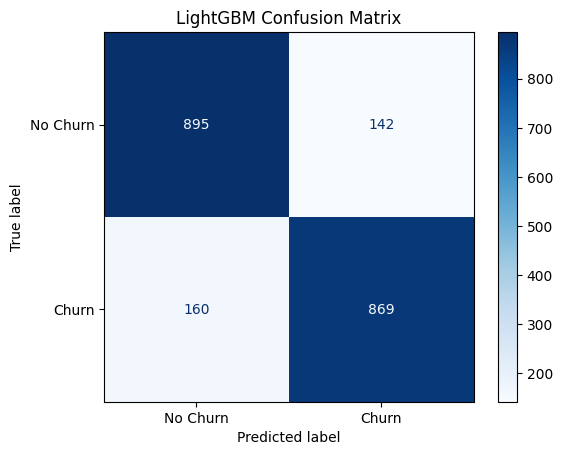

In [195]:
evaluate_model(grid_lightgbm.best_estimator_, X_test, y_test, "LightGBM")

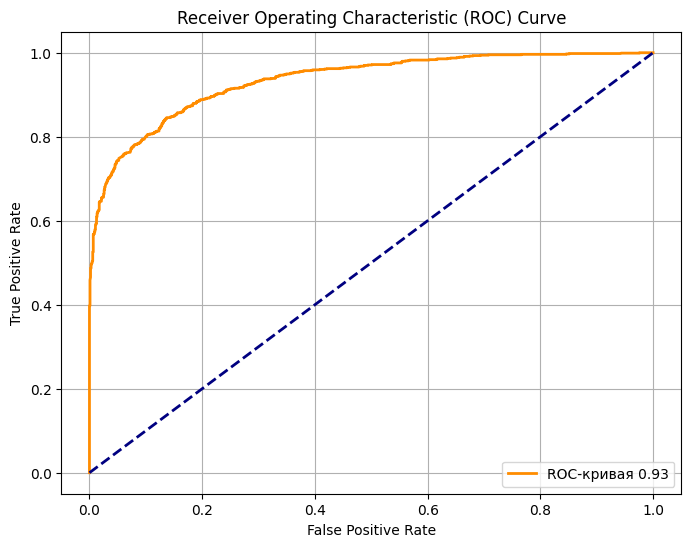

In [196]:
roc_auc_plot(y_test, lightgbm_pred_proba)

#### Catboost

In [197]:
parameters = {'iterations': [5, 10, 50, 100],
              'depth':[3, 5, 10],
              # 'max_leaves' : [5, 10, 20, 30],
              # 'min_data_in_leaf': [500, 750, 1000, 1500]
              }

In [198]:
catboost_model = CatBoostClassifier()

grid_catboost = GridSearchCV(catboost_model, parameters, scoring = 'accuracy')

grid_catboost.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5636942	total: 2.28ms	remaining: 9.12ms
1:	learn: 0.4718921	total: 4.6ms	remaining: 6.9ms
2:	learn: 0.4320389	total: 7ms	remaining: 4.66ms
3:	learn: 0.4111489	total: 9.79ms	remaining: 2.45ms
4:	learn: 0.3906450	total: 12.2ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5690711	total: 2.26ms	remaining: 9.03ms
1:	learn: 0.5024254	total: 4.63ms	remaining: 6.95ms
2:	learn: 0.4721867	total: 6.67ms	remaining: 4.45ms
3:	learn: 0.4433697	total: 8.73ms	remaining: 2.18ms
4:	learn: 0.4226104	total: 11.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5654851	total: 2.11ms	remaining: 8.45ms
1:	learn: 0.4740556	total: 4.74ms	remaining: 7.11ms
2:	learn: 0.4385641	total: 7.13ms	remaining: 4.75ms
3:	learn: 0.4202834	total: 9.49ms	remaining: 2.37ms
4:	learn: 0.4029431	total: 12.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5606095	total: 2.15ms	remaining: 8.61ms
1:	learn: 0.4729653	total: 4.9ms	remaining: 7.34ms
2:	learn: 0.4387572	total: 7.3m

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7e9e7981ce80>,
             param_grid={'depth': [3, 5, 10], 'iterations': [5, 10, 50, 100]},
             scoring='accuracy')

In [199]:
best_params = grid_catboost.best_params_
best_params

{'depth': 3, 'iterations': 100}

In [200]:
# catboost_model = CatBoostClassifier(iterations = best_params['iterations'],
#                                     depth = best_params['depth'],
#                                     # num_leaves = best_params['num_leaves'],
#                                     # subsample_for_bin = best_params['subsample_for_bin'],
#                                    )

# catboost_model.fit(X_train, y_train)

In [201]:
catboost_pred = grid_catboost.best_estimator_.predict(X_test)
catboost_pred_proba = grid_catboost.best_estimator_.predict_proba(X_test)

catboost_precision = precision_score(y_test, catboost_pred)
catboost_recall = recall_score(y_test, catboost_pred)
catboost_f1 = f1_score(y_test, catboost_pred)
# lightgbm_roc_auc = roc_auc_score(y_test, lightgbm_pred_proba[:, 1])
print(f'Precision LightGBM: {catboost_precision:.2f} \nRecall LightGBM: {catboost_recall:.2f}\nF1 LightGBM: {catboost_f1:.2f}')

Precision LightGBM: 0.86 
Recall LightGBM: 0.84
F1 LightGBM: 0.85


CatBoost Accuracy: 0.85
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1037
           1       0.86      0.84      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



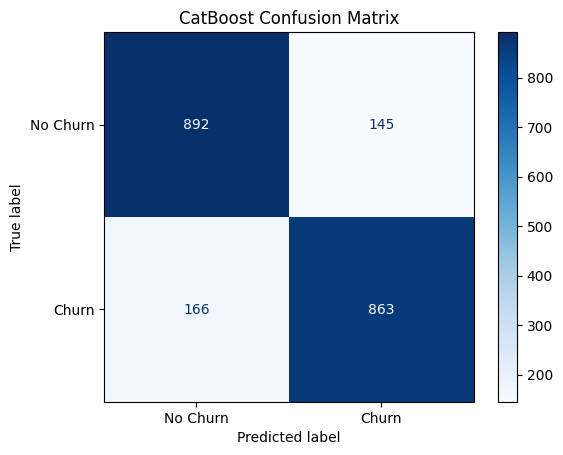

In [202]:
evaluate_model(grid_catboost.best_estimator_, X_test, y_test, "CatBoost")

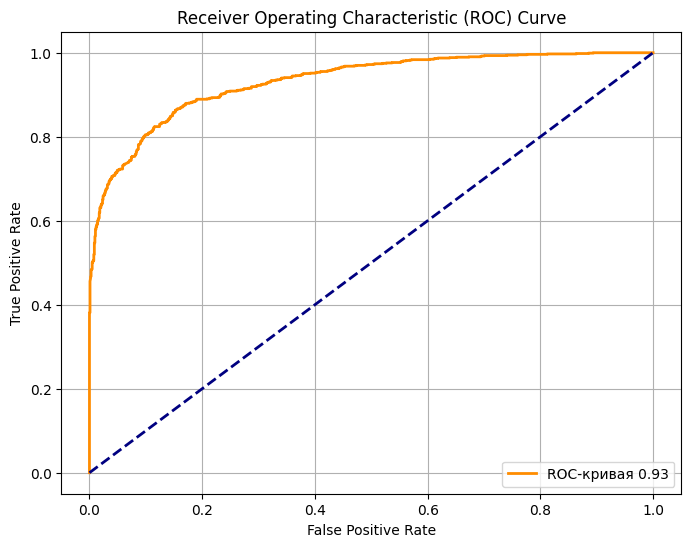

In [203]:
roc_auc_plot(y_test, catboost_pred_proba)

#### XGBClassifier

In [204]:
parameters = {'n_estimators': [5, 10, 50, 100],
              'max_depth':[1, 3, 5, 10],
              'num_leaves' : [5, 10, 20, 30],
              'subsample_for_bin': [500, 750, 1000, 1500]
              }

In [205]:
xgb_model = XGBClassifier()

grid_xgb = GridSearchCV(xgb_model, parameters, scoring = 'accuracy')

grid_xgb.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_leaves", "subsample_for_bin" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_leaves", "subsample_for_bin" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_leaves", "subsample_for_bin" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:52:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_leaves", "subsample_for_bin" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/di

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [1, 3, 5, 10],
                         'n_estimators': [5, 10, 50, 100],
                         'num_leaves': [5, 10, 20, 30],
                         'subsample_for_bin': [500, 750, 1000, 1500]},
             scoring='accuracy')

In [206]:
best_params = grid_xgb.best_params_
best_params

{'max_depth': 3, 'n_estimators': 50, 'num_leaves': 5, 'subsample_for_bin': 500}

In [207]:
# xgb_model = XGBClassifier(n_estimators = best_params['n_estimators'],
#                           max_depth = best_params['max_depth'],
#                           num_leaves = best_params['num_leaves'],
#                           subsample_for_bin = best_params['subsample_for_bin']
#                           )

# xgb_model.fit(X_train, y_train)

In [208]:
xgb_pred = grid_xgb.best_estimator_.predict(X_test)
xgb_pred_proba = grid_xgb.best_estimator_.predict_proba(X_test)

LightGBM Accuracy: 0.85
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1037
           1       0.85      0.85      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



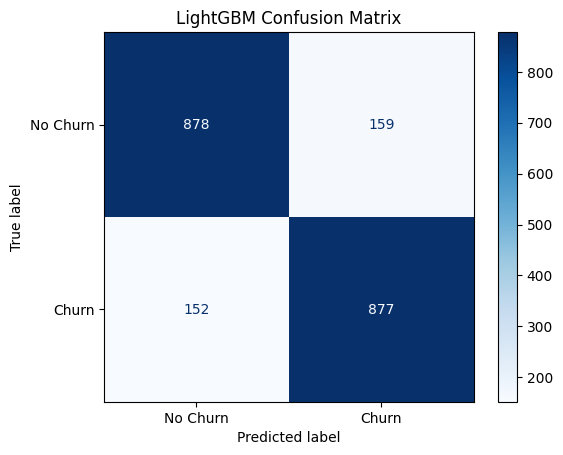

In [209]:
evaluate_model(grid_xgb.best_estimator_, X_test, y_test, "LightGBM")

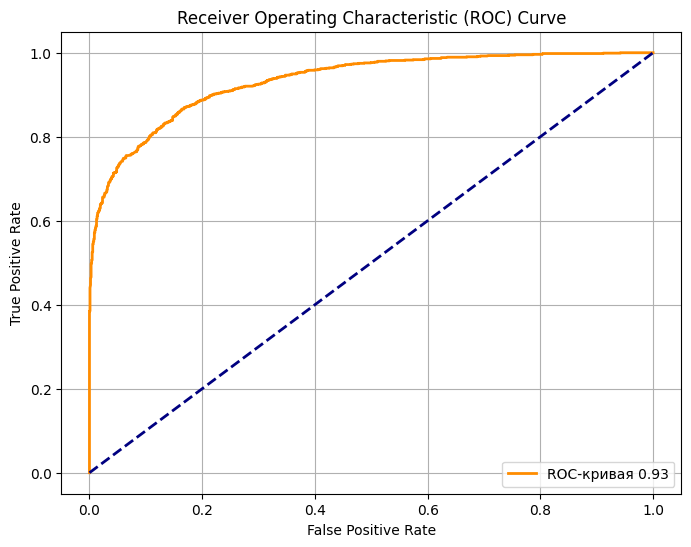

In [210]:
roc_auc_plot(y_test, xgb_pred_proba)

#### GradientBoostingClassifier

In [211]:
parameters = {'n_estimators': [5, 10, 50, 100],
              'max_depth':[1, 3, 5, 10],
              # 'max_leaf_nodes' : [5, 10, 20, 30],
              # 'subsample_for_bin': [500, 750, 1000, 1500]
              }

In [212]:
gbc_model = GradientBoostingClassifier()

grid_gbc = GridSearchCV(gbc_model, parameters, scoring = 'accuracy')

grid_gbc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 3, 5, 10],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='accuracy')

In [213]:
best_params = grid_gbc.best_params_
best_params

{'max_depth': 5, 'n_estimators': 100}

In [214]:
# gbc_model = GradientBoostingClassifier(n_estimators = best_params['n_estimators'],
#                                       max_depth = best_params['max_depth'],
#                                       # num_leaves = best_params['num_leaves'],
#                                       # subsample_for_bin = best_params['subsample_for_bin']
#                                       )

# gbc_model.fit(X_train, y_train)

In [215]:
gbc_pred = grid_gbc.best_estimator_.predict(X_test)
gbc_pred_proba = grid_gbc.best_estimator_.predict_proba(X_test)

GradientBoostingClassifier Accuracy: 0.85
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1037
           1       0.86      0.84      0.85      1029

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



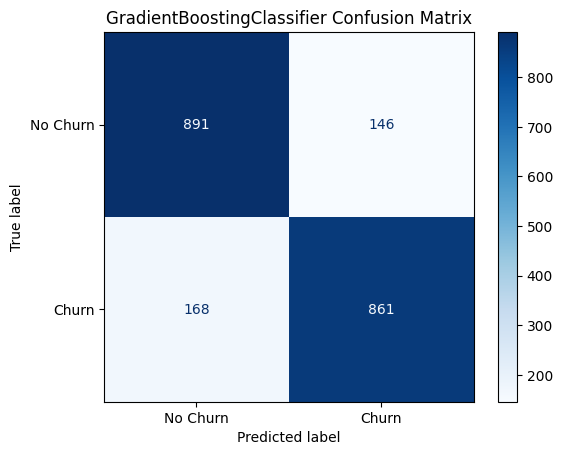

In [216]:
evaluate_model(grid_gbc.best_estimator_, X_test, y_test, "GradientBoostingClassifier")

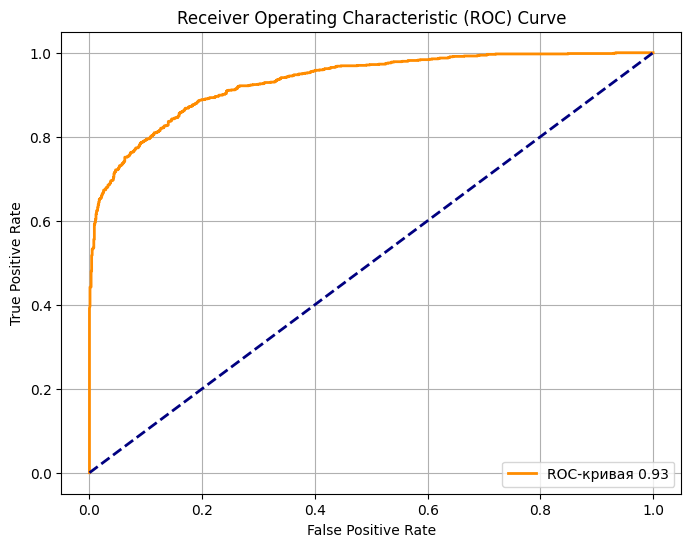

In [217]:
roc_auc_plot(y_test, gbc_pred_proba)